In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
print(torch.cuda.is_available(), torch.backends.cudnn.enabled)

True True


In [4]:
#  Fast.ai only accepts image files for Computer Vision, but we have CSV files containing the pixel values for each pixel of each image. 
# If we want to use fast.ai we have to create images from the data we have.

In [5]:
# 1. Let's first create the folder structure!

In [4]:
path = Path('C:\\Users\\bokhy\\Desktop\\kaggle\\digit-recognizer\\')

In [5]:
path

WindowsPath('C:/Users/bokhy/Desktop/kaggle/digit-recognizer')

In [6]:
train_df = pd.read_csv(os.path.join(path, 'train.csv'))
test_df = pd.read_csv(os.path.join(path, 'test.csv'))

In [7]:
TRAIN = os.path.join(path, 'train')
TEST = os.path.join(path, 'test')

In [6]:
# Create Train directory
for index in range(10):
    a = os.path.join(TRAIN,str(index))
    os.makedirs(str(a), exist_ok =True)

In [7]:
# Create Test directory
for index in range(10):
    a = TEST
    os.makedirs(str(a), exist_ok =True)

In [8]:
# import numpy to reshape array from flat (1x784) to square (28x28)
def saveDigit(digit, filepath):
    digit = digit.reshape(28,28)
    digit = digit.astype(np.uint8)

    img = Image.fromarray(digit)
    img.save(filepath)

In [9]:
# Generate Train image using above func
for index, row in train_df.iterrows():
    
    label,digit = row[0], row[1:]
    
    folder = os.path.join(TRAIN,str(label))
    filename = f"{index}.jpg"
    filepath = Path(folder)/Path(filename)
    
    digit = digit.values
    
    saveDigit(digit, filepath)    

In [10]:
# Generate Test image using above func
for index, digit in test_df.iterrows():

    folder = TEST
    filename = f"{index}.jpg"
    filepath = Path(folder)/Path(filename)
    
    digit = digit.values
    
    saveDigit(digit, filepath)

In [ ]:
# (Optional)
# Display images
# import matplotlib to arrange the images properly

def displayData():
    fig = plt.figure(figsize=(5,10))
    
    for rowIndex in range(1, 10):
        subdirectory = str(rowIndex)
        path = TRAIN/subdirectory
        images = os.listdir(path)
        for sampleIndex in range(1, 6):
            randomNumber = random.randint(0, len(images)-1)
            image = Image.open(path/images[randomNumber])
            ax = fig.add_subplot(10, 5, 5*rowIndex + sampleIndex)
            ax.axis("off")
            
            plt.imshow(image, cmap='gray')
        
    plt.show()

In [ ]:
displayData()

In [ ]:
tfms = ([*rand_pad(padding=5, size=28, mode='zeros')], [])
# padding 5

In [8]:
tfms = get_transforms(do_flip=False, max_rotate=20,flip_vert=False)

In [9]:
#batch size
bs = 256

In [10]:
data = ImageDataBunch.from_folder(
    path = path,
    train = TRAIN,
    test = TEST,
    valid_pct = 0.1,
    bs = bs,
    size = 28,
    num_workers = 0,
    ds_tfms = tfms
)

In [11]:
data = data.normalize(imagenet_stats)

In [13]:
import torchvision.models as models
# resnet18 = models.resnet18(pretrained=True)
# alexnet = models.alexnet(pretrained=True)
# squeezenet = models.squeezenet1_0(pretrained=True)
# vgg16 = models.vgg16(pretrained=True)
# densenet = models.densenet161(pretrained=True)
# inception = models.inception_v3(pretrained=True)
# googlenet = models.googlenet(pretrained=True)
# shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
# mobilenet = models.mobilenet_v2(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
# wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to C:\Users\bokhy/.cache\torch\checkpoints\resnext50_32x4d-7cdf4587.pth
100%|█████████████████████████████████████████████████████████████████████████████| 95.8M/95.8M [00:05<00:00, 18.4MB/s]


In [12]:
learn = cnn_learner(data, models.resnet101, loss_func = nn.CrossEntropyLoss(), metrics=accuracy, callback_fns=ShowGraph, ps = 0.3)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\bokhy/.cache\torch\checkpoints\resnet101-5d3b4d8f.pth
100%|███████████████████████████████████████████████████████████████████████████████| 170M/170M [00:10<00:00, 17.8MB/s]


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


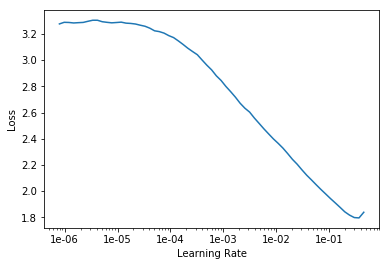

In [13]:
learn.lr_find(wd = 0.1, end_lr=100)
learn.recorder.plot()

In [14]:
lr = 1e-2

epoch,train_loss,valid_loss,accuracy,time
0,0.804525,0.517236,0.836905,02:28
1,0.335518,0.170585,0.944048,04:42
2,0.173899,0.114672,0.960476,03:24
3,0.122084,0.073360,0.975238,03:09
4,0.101389,0.067889,0.979286,03:11


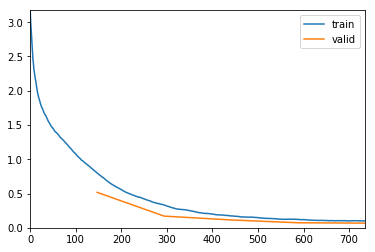

In [15]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


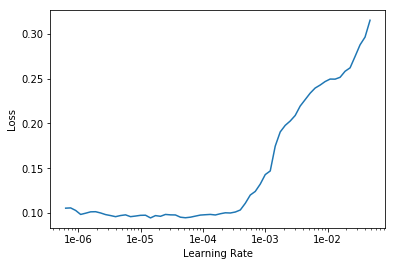

In [16]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [18]:
gc.collect()

22

epoch,train_loss,valid_loss,accuracy,time
0,0.089270,0.048607,0.983333,04:18
1,0.076222,0.047641,0.982619,03:33
2,0.062781,0.039198,0.985952,03:26
3,0.064511,0.035472,0.989048,04:05
4,0.063453,0.092701,0.988333,03:30
5,0.050543,0.032899,0.990476,03:09
6,0.051713,0.035435,0.991190,03:21
7,0.043912,0.028841,0.992857,04:53
8,0.043220,0.025698,0.993810,04:05
9,0.038342,0.024969,0.993571,03:02


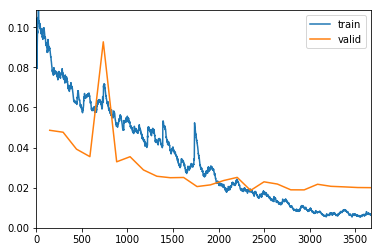

In [19]:
#learn.fit_one_cycle(25, slice(1e-5,lr/5),moms=(0.8,0.7))
learn.fit_one_cycle(25, slice(1e-4,lr/5))

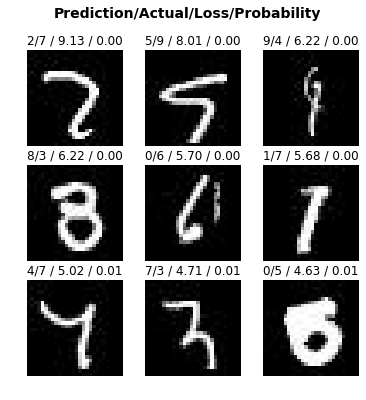

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9,figsize=(6,6))

In [21]:
pred_test, y = learn.get_preds(DatasetType.Test)

In [41]:
pred_test

tensor([[2.8859e-12, 4.6895e-14, 1.0000e+00,  ..., 6.7330e-14, 1.4200e-15,
         9.4399e-13],
        [1.0000e+00, 5.8600e-09, 2.1683e-08,  ..., 1.3907e-08, 8.9833e-08,
         1.1618e-07],
        [9.0467e-08, 3.8581e-08, 2.5061e-07,  ..., 2.3829e-07, 2.5707e-06,
         1.8032e-06],
        ...,
        [3.1251e-05, 1.3662e-05, 9.9985e-01,  ..., 4.8878e-05, 4.2385e-06,
         1.1131e-05],
        [4.0457e-05, 3.2701e-04, 1.1567e-04,  ..., 9.9752e-01, 5.2869e-05,
         1.4400e-03],
        [6.3982e-08, 1.3844e-06, 1.0351e-06,  ..., 9.9999e-01, 5.9183e-08,
         1.4659e-06]])

In [42]:
y

tensor([0, 0, 0,  ..., 0, 0, 0])

In [43]:
probabilities = pred_test[0].tolist() # look at the predict for the very first row
[f"{index}: {probabilities[index]}" for index in range(len(probabilities))]

['0: 9.046744509078053e-08',
 '1: 3.858092867403684e-08',
 '2: 2.5060654706976493e-07',
 '3: 1.2163687642896548e-05',
 '4: 2.6341792747075488e-08',
 '5: 0.9999821186065674',
 '6: 7.235487373691285e-07',
 '7: 2.382861055139074e-07',
 '8: 2.5706888209242607e-06',
 '9: 1.8032319530902896e-06']

In [22]:
test_result = torch.argmax(pred_test,dim=1)
pred_test = test_result.numpy()

In [23]:
len(pred_test)

28000

In [24]:
# remove file extension from filename
ImageId = [os.path.splitext(path)[0] for path in os.listdir(TEST)]
# typecast to int so that file can be sorted by ImageId
ImageId = [int(path) for path in ImageId]
# +1 because index starts at 1 in the submission file
ImageId = [ID+1 for ID in ImageId]

In [25]:
len(ImageId)

28000

In [26]:
submission  = pd.DataFrame({
    "ImageId": ImageId,
    "Label": pred_test
})
submission.sort_values(by=["ImageId"], inplace = True)
submission.to_csv("MNIST_final.csv", index=False)

In [24]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
11112,3,9
20223,4,0
21334,5,3
